In [1]:
pip install easyocr

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB 660.6 kB/s eta 0:00:05
    --------------------------------------- 0.1/2.9 MB 656.4 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.9 MB 819.2 kB/s eta 0:00:04
   - -------------------------------------- 0.1/2.9 MB 722.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.9 MB 756.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.9 MB 778.2 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.9 MB 793.0 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/2.9 MB 768.0 kB/s eta 0:00:04
   ---- ----------------------------------- 0.3/2.9 MB 811.9 kB/s eta 0:00:04
   ---- ----------------------------------- 0.4/2.9 MB 794.9 kB/s eta 0:00:04
   ----- ---------------------------------- 0.4/2.9 MB 764.2 kB/s eta 0:00:04
   ------ --------------------------------- 0.5/2.9 MB 805.0 kB/s eta 0:0

Using CPU. Note: This module is much faster with a GPU.


([[1286, 520], [1348, 520], [1348, 576], [1286, 576]], 'S', 0.5270724675466596)
([[1310, 592], [1336, 592], [1336, 626], [1310, 626]], 'E96', 0.19052841007810478)
([[1087, 689], [1135, 689], [1135, 725], [1087, 725]], 'MAE', 0.7731808413934789)
([[1189, 713], [1229, 713], [1229, 733], [1189, 733]], 'QAceM', 0.1451511405360772)
([[1438, 728], [1490, 728], [1490, 760], [1438, 760]], 'Maeesk', 0.1117003673246622)
([[1087, 759], [1135, 759], [1135, 795], [1087, 795]], 'MAL', 0.801422818117693)
([[1333, 767], [1404, 767], [1404, 807], [1333, 807]], 'Maersk ^', 0.13947412350105085)
([[1438, 780], [1490, 780], [1490, 808], [1438, 808]], 'Maefek', 0.17140202898107706)
([[835, 936], [984, 936], [984, 965], [835, 965]], 'MAERSK', 0.9117239869287646)
([[999, 932], [1106, 932], [1106, 960], [999, 960]], 'Edirne', 0.8299982818910748)
([[1399.0685071343348, 629.230163555236], [1432.897366596101, 634.3675444679664], [1429.9314928656652, 651.769836444764], [1396.102633403899, 646.6324555320336]], '(ua

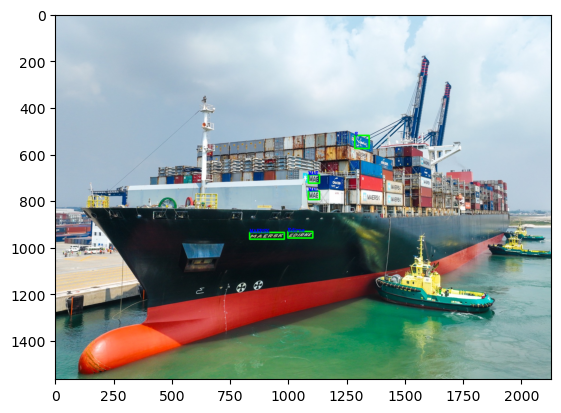

In [5]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read image
image_path = r'C:\Users\mdale\Downloads\vessel1.jpeg'

img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Using CPU. Note: This module is much faster with a GPU.


([[166, 126], [448, 126], [448, 182], [166, 182]], 'ROAD CLOSED', 0.999406698445185)
([[167, 181], [447, 181], [447, 221], [167, 221]], 'TO ALL PEDESTRIAN', 0.9704423461894937)
([[209, 220], [409, 220], [409, 258], [209, 258]], 'AND BIKE USE', 0.9281838378161597)
Detected Text:
ROAD CLOSED
TO ALL PEDESTRIAN
AND BIKE USE


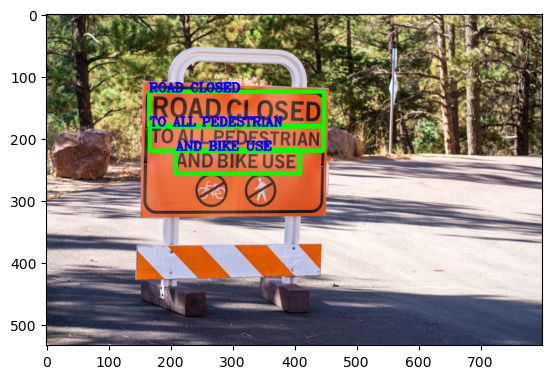

In [9]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# read image
image_path = r'C:\Users\mdale\Downloads\test1.png'

img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25

detected_text = []  # List to store detected text

# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)
        
        detected_text.append(text)  # Append detected text to the list

# Print detected text
print("Detected Text:")
for text in detected_text:
    print(text)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [10]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# Threshold for confidence score
threshold = 0.25

# Function to process each frame
def process_frame(frame):
    # Detect text on the frame
    text_ = reader.readtext(frame)
    
    detected_text = []  # List to store detected text
    
    # Draw bounding box and text
    for t_, t in enumerate(text_):
        bbox, text, score = t

        if score > threshold:
            cv2.rectangle(frame, bbox[0], bbox[2], (0, 255, 0), 5)
            cv2.putText(frame, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)
            
            detected_text.append(text)  # Append detected text to the list
    
    # Print detected text
    print("Detected Text:")
    for text in detected_text:
        print(text)
    
    # Show the frame
    cv2.imshow("Frame", frame)
    
    # Wait for key press and check if 'q' is pressed to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        return False
    
    return True

# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

# Loop to capture frames from the camera
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Process each frame
    if not process_frame(frame):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


Using CPU. Note: This module is much faster with a GPU.


Detected Text:


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
